In [2]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import pandas as pd
import warnings


## Iris data set

see here: https://archive.ics.uci.edu/ml/datasets/iris

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [3]:
# lets load the iris data set 

from sklearn import datasets
iris = datasets.load_iris()

# define x and y
x=iris.data
y=iris.target




In [4]:
# look at x
print(x.shape)

(150, 4)


In [5]:
# we have 150 instances with 4 features each
# let's print the first vector
print (x[0])

[5.1 3.5 1.4 0.2]


In [10]:
# look at y
print(y.shape,y)

(150,) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# The iris data set is a classification, which means y is a class to which the respective x belongs to

## Principal component analysis

we will use scikit learns built-in-pca function for PCA

In [11]:
from sklearn.decomposition import PCA

# Initialize the PCA object with the desired number of components - cannot be more than features
pca = PCA(n_components=4)

# Fit the PCA model to the data
pca.fit(x)

# Transform the data to the new PCA space
transformed_data = pca.transform(x)


In this example, we initialize a PCA object with 4 components, fit the model to the molecular data, and transform the data to the new PCA space. The transformed data can then be used for visualization or further analysis.


### Showing variances

To show the explained variances of the principal components obtained from a PCA analysis, you can use the explained_variance_ratio_ attribute of the PCA object. This attribute returns the fraction of the total variance explained by each principal component in descending order.

Here's an example code snippet to show the explained variances and plot them using Python's Matplotlib library:

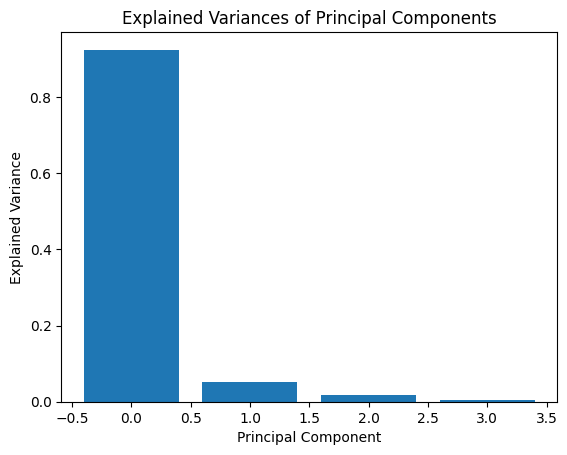

In [12]:
# Get the explained variances of the principal components
variances = pca.explained_variance_ratio_

# Plot the variances as a bar chart
fig, ax = plt.subplots()
ax.bar(range(len(variances)), variances)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
ax.set_title('Explained Variances of Principal Components')
plt.show()

### Plotting data

You can see that most of the variances lies on the PC1 --> we can now plot the data set against x1 and x2 and once against pc1 and pc2.
To create a scatter plot of the data in x1 and x2 and the first two principal components (pc1 and pc2), you can use Matplotlib's scatter() function.

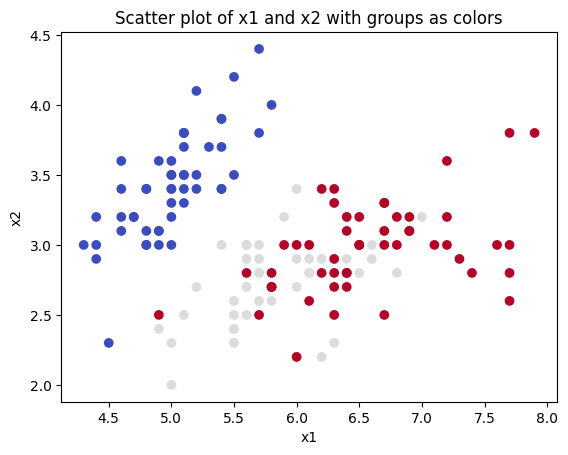

In [17]:
# Get the first two principal components
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]

# Create a scatter plot of x1 and x2 with PC1 and PC2 as color
fig, ax = plt.subplots()
ax.scatter(x[:,0], x[:,1], c=y, cmap='coolwarm')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Scatter plot of x1 and x2 with groups as colors')
plt.show()

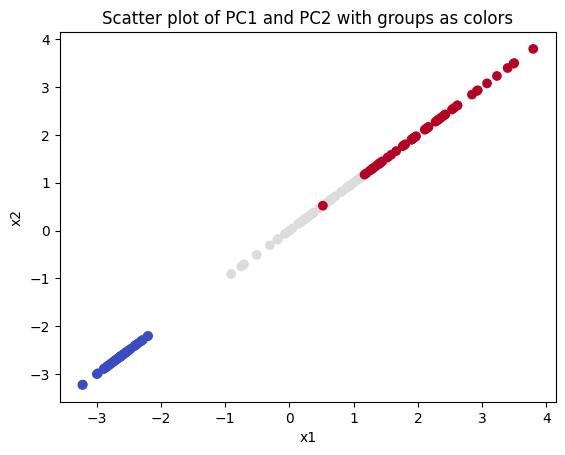

In [18]:

# Create a scatter plot of x1 and x2 with PC1 and PC2 as color
fig, ax = plt.subplots()
ax.scatter(pc1,pc1, c=y, cmap='coolwarm')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Scatter plot of PC1 and PC2 with groups as colors')
plt.show()

As expected, we can see that one class is separable, while two are not.

## Let's analyse what is important for each PC

We can use the components_ attribute of the PCA object to determine how much each x feature contributes to each principal component. The components_ attribute returns a matrix where each row corresponds to a principal component and each column corresponds to an x feature. The values in the matrix indicate the weight of each x feature in the corresponding principal component.



In [20]:
# Get the weight of each x feature in each principal component
weights = pca.components_

# Print the weights
for i, pc in enumerate(weights):
    print(f'PC{i+1} weights:', pc**2)

PC1 weights: [0.13060027 0.00714406 0.73388453 0.12837115]
PC2 weights: [0.43110881 0.53313572 0.03005808 0.00569738]
PC3 weights: [0.33875875 0.35749736 0.00581194 0.29793195]
PC4 weights: [0.09953217 0.10222286 0.23024545 0.56799951]


You can now see that the third axes is the most imporant for PC1, followed by axis 1 and 2, we can try to plot it and see if it looked more separable than in the first plot:

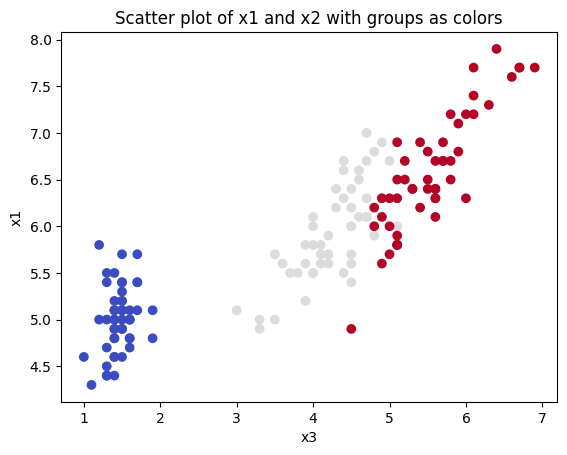

In [21]:
# Get the first two principal components
pc1 = transformed_data[:, 0]
pc2 = transformed_data[:, 1]

# Create a scatter plot of x1 and x2 with PC1 and PC2 as color
fig, ax = plt.subplots()
#plotting axis 3 against 1
ax.scatter(x[:,2], x[:,0], c=y, cmap='coolwarm')
ax.set_xlabel('x3')
ax.set_ylabel('x1')
ax.set_title('Scatter plot of x3 and x1 with groups as colors')
plt.show()

# Kernel PCA - Nonlinearity

We can perform Kernel PCA (kPCA) to obtain nonlinear principal components from the data. kPCA is a variation of PCA that uses a nonlinear mapping of the data to a high-dimensional feature space before applying PCA.

Scikit-learn also provides an implementation of kPCA, similar to PCA. The main difference is that we need to specify the kernel function to use as a parameter when instantiating the kPCA object. The kernel function is used to compute the dot product between pairs of samples in the high-dimensional feature space.

Here's an example code snippet that shows how to perform kPCA on a molecular dataset:

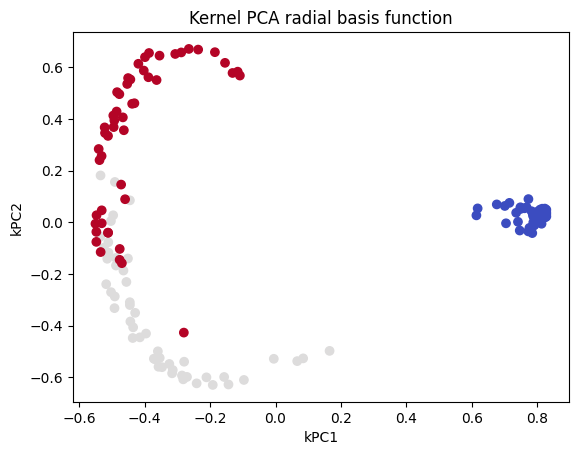

In [27]:
from sklearn.decomposition import KernelPCA

# Instantiate a kPCA object with a radial basis function (RBF) kernel
kpca = KernelPCA(n_components=2, kernel='rbf')

# Fit and transform the data using kPCA
transformed_data = kpca.fit_transform(x)

# Plot the transformed data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1],c=y,cmap="coolwarm")
plt.xlabel('kPC1')
plt.ylabel('kPC2')
plt.title('Kernel PCA radial basis function')
plt.show()

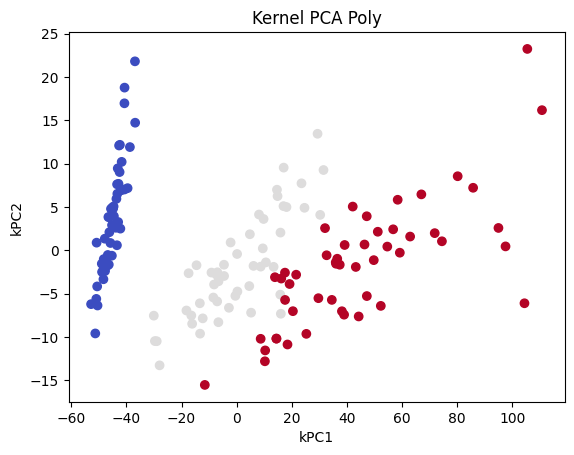

In [28]:
# We can also test other kernels

from sklearn.decomposition import KernelPCA

# Instantiate a kPCA object with a radial basis function (RBF) kernel
kpca = KernelPCA(n_components=2, kernel='poly')

# Fit and transform the data using kPCA
transformed_data = kpca.fit_transform(x)

# Plot the transformed data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1],c=y,cmap="coolwarm")
plt.xlabel('kPC1')
plt.ylabel('kPC2')
plt.title('Kernel PCA Poly')
plt.show()

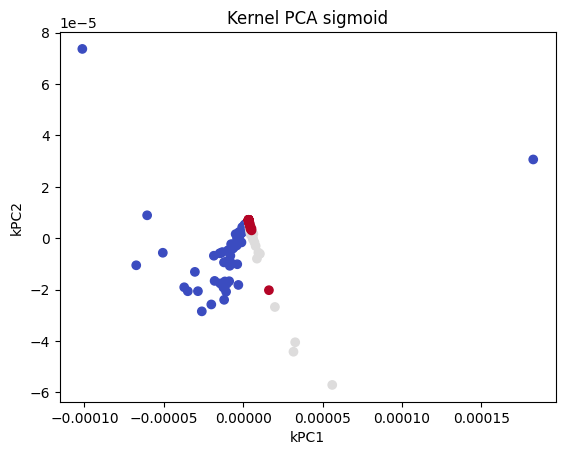

In [26]:
# We can also test other kernels

from sklearn.decomposition import KernelPCA

# Instantiate a kPCA object with a radial basis function (RBF) kernel
kpca = KernelPCA(n_components=2, kernel='sigmoid')

# Fit and transform the data using kPCA
transformed_data = kpca.fit_transform(x)

# Plot the transformed data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1],c=y,cmap="coolwarm")
plt.xlabel('kPC1')
plt.ylabel('kPC2')
plt.title('Kernel PCA sigmoid')
plt.show()

# Your task (voluntary)

As a first exercise, use your chemistry data of choice that you might already have from your lab or previous exercise or that you found online.
You can, for instance, use an existing data set like QM9, amino acid data set, etc. There are many resources online, see e.g. http://quantum-machine.org/datasets/ or https://www.nature.com/articles/sdata20169, the PDB data set, NOMAD, ... .

Follow the following tasks:

1.    Load the data and define a molecular descriptor - therefore, you can use fingerprints or any 3D descriptor, like inverse distance matrices, etc. You can e.g. use RDKit for the descriptor generation.
2.   Via PCA or a nonlinear dimensionality reduction algorithm, visualize your data. 
3.   Explain the variances and analyse which features are important for the PCs with most variances in the data. Visualize the results.
4.   Try to interpret the results from a chemical perspective.


Justify each of your choices (descriptor, algorithm) and upload your notebook in Moodle until 26 April, 2023 to receive bonus points. 